<a href="https://www.kaggle.com/code/joeportilla/producci-n-mensual-de-energ-a-en-colombia-eda?scriptVersionId=125157224" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 0. Introducción

<img src="https://raw.githubusercontent.com/JoePortilla/EnergyProductionCol-EDA/main/img/energyproduction_eda_cover.webp?token=GHSAT0AAAAAAB6AMADC5TFIULPHAY4XD3FUZBR77PA" width="800" alt="logo" style="display:block;margin:auto;">

- El conjunto de datos proporciona estadísticas mensuales de electricidad de la Agencia Internacional de Energía (AIE) para múltiples países y territorios en todo el mundo.
- Incluye información sobre la generación de electricidad mensual desde 2010 hasta 2022.
- La producción de energía se mide en gigavatios-hora (GWh) y abarca una variedad de productos energéticos, incluyendo hidroeléctrica, eólica, solar, geotérmica, nuclear, combustibles fósiles y otros.
- Estos datos pueden ser útiles para analizar las tendencias de consumo y producción de electricidad a nivel mundial y regional, así como para evaluar el impacto ambiental de la industria eléctrica.

## Objetivo general
Work in progress.

## Objetivo especifico
Este notebook se centra en explorar y visualizar el conjunto de datos.
- Realizar un análisis exploratorio de datos para comprender los datos. 
- Work in progress.

## Paquetes utilizados
- Procesamiento de datos
    - Pandas.
- Procesamiento numérico.
    - NumPy
- Visualización de datos
    - Seaborn
    - Matplotlib.

## Dataset
- [Monthly Electricity Production in GWh [2010-2022]](https://www.kaggle.com/datasets/ccanb23/iea-monthly-electricity-statistics)

## Referencias
- [International Energy Agency (IEA)](https://www.iea.org/data-and-statistics/data-tools/monthly-electricity-statistics)

## Instructor
Joseph Santiago Portilla - Ingeniero Electrónico.
- GitHub: https://github.com/JoePortilla
- Twitter: https://twitter.com/JoePortilla
- LinkedIn: https://www.linkedin.com/in/PortillaJoe
- Kaggle: https://www.kaggle.com/joeportilla


# 1. Ajustes Iniciales

## 1.1 Importación de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Definición de estilo de gráficas

In [2]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-whitegrid")

# 2. Carga de Dataset y Revisión inicial

## 2.1. Lectura de CSV

In [3]:
df = pd.read_csv('/kaggle/input/iea-monthly-electricity-statistics/data.csv')

## 2.2. Exploración inicial del dataframe

### Info. general del dataset

El conjunto de datos contiene las siguientes variables:

- `COUNTRY`: Nombre del país
- `CODE_TIME`: Un código que representa el mes y año (por ejemplo, JAN2010 para enero de 2010)
- `TIME`: El mes y año en un formato más legible para los humanos (por ejemplo, enero de 2010)
- `YEAR`: El año del dato
- `MONTH`: El mes del dato como un número (1-12)
- `MONTH_NAME`: El mes del dato como una cadena (por ejemplo, enero)
- `PRODUCT`: El tipo de producto energético (por ejemplo, Hidroeléctrica, Eólica, Solar)
- `VALUE`: La cantidad de electricidad generada en gigavatios-hora (GWh)
- `DISPLAY_ORDER`: El orden en el que se deben mostrar los productos
- `yearToDate`: La cantidad de electricidad generada para el año actual hasta el mes actual en GWh
- `previousYearToDate`: La cantidad de electricidad generada para el año anterior hasta el mes actual en GWh
- `share`: La participación del producto en la generación total de electricidad para el país en formato decimal.

### Variables categoricas
- COUNTRY
- CODE_TIME
- TIME
- MONTH_NAME
- PRODUCT

### Variables numéricas
- YEAR
- MONTH
- VALUE
- DISPLAY_ORDER
- yearToDate
- previousYearToDate
- share

In [4]:
df

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728000,1,1.647189e+04,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469000,2,4.940909e+03,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216000,3,9.082380e+02,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083000,4,9.960000e-01,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730000,7,2.143030e+05,NaN,0.930108
...,...,...,...,...,...,...,...,...,...,...,...,...
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,23,3.355042e+06,3.320634e+06,0.791164
181911,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,24,5.393606e+04,4.899452e+04,0.021693
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,25,7.100997e+04,7.242158e+04,0.016594
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,146425.474534,26,1.749805e+06,1.670531e+06,0.396168


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181915 entries, 0 to 181914
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COUNTRY             181915 non-null  object 
 1   CODE_TIME           181915 non-null  object 
 2   TIME                181915 non-null  object 
 3   YEAR                181915 non-null  int64  
 4   MONTH               181915 non-null  int64  
 5   MONTH_NAME          181915 non-null  object 
 6   PRODUCT             181915 non-null  object 
 7   VALUE               181915 non-null  float64
 8   DISPLAY_ORDER       181915 non-null  int64  
 9   yearToDate          181915 non-null  float64
 10  previousYearToDate  164810 non-null  float64
 11  share               181915 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.7+ MB


In [6]:
df['COUNTRY'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'IEA Total', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'OECD Americas',
       'OECD Asia Oceania', 'OECD Europe', 'OECD Total', 'Poland',
       'Portugal', 'Republic of Turkiye', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States', 'Colombia', 'Argentina', 'Brazil', 'Bulgaria',
       'Croatia', 'Cyprus', 'India', 'Malta', 'North Macedonia',
       'Romania', 'Serbia', 'Costa Rica'], dtype=object)

In [7]:
df['PRODUCT'].unique()

array(['Hydro', 'Wind', 'Solar', 'Geothermal', 'Total combustible fuels',
       'Coal', 'Oil', 'Natural gas', 'Combustible renewables',
       'Net electricity production', 'Electricity supplied',
       'Used for pumped storage', 'Distribution losses',
       'Final consumption', 'Renewables', 'Non-renewables', 'Others',
       'Other renewables aggregated', 'Low carbon', 'Fossil fuels',
       'Other combustible non-renewables', 'Not specified',
       'Total imports', 'Total exports', 'Electricity trade', 'Nuclear',
       'Other renewables'], dtype=object)

### Dimensión del datafrane

In [8]:
df.shape

(181915, 12)

### Comprobación de valores faltantes

El dataset esta completo y no cuenta con valores faltantes

In [9]:
df.isnull().sum(axis=0)

COUNTRY                   0
CODE_TIME                 0
TIME                      0
YEAR                      0
MONTH                     0
MONTH_NAME                0
PRODUCT                   0
VALUE                     0
DISPLAY_ORDER             0
yearToDate                0
previousYearToDate    17105
share                     0
dtype: int64

# 3. Preprocesamiento

## Feature selection

In [10]:
df.drop(['CODE_TIME', 'TIME', 'DISPLAY_ORDER', 'yearToDate', 'previousYearToDate'], axis=1, inplace=True)

## Column renaming

In [11]:
df.rename(columns={'COUNTRY':'country',
                   'YEAR':'year',
                   'MONTH':'month',
                   'MONTH_NAME':'month_name',
                   'PRODUCT':'product',
                   'VALUE':'value'},
          inplace=True)

## Value renaming

In [12]:
df['product'].replace({'Other renewables aggregated': 'Other renew. agg.'}, inplace=True)

## Feature construction

In [13]:
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

## Data filtering

In [14]:
filt = (df['country'] == 'Colombia')
df = df.loc[filt]

## 3.4. Dataframe preprocesado

In [15]:
df.head()

,country,year,month,month_name,product,value,share,datetime
46557,Colombia,2014,1,January,Hydro,3903.977,0.684582,2014-01-01
46558,Colombia,2014,1,January,Wind,5.648,0.000990,2014-01-01
46559,Colombia,2014,1,January,Solar,1.065,0.000187,2014-01-01
46560,Colombia,2014,1,January,Total combustible fuels,1792.024,0.314241,2014-01-01
46561,Colombia,2014,1,January,Coal,521.938,0.091524,2014-01-01


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 46557 to 180953
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     2548 non-null   object        
 1   year        2548 non-null   int64         
 2   month       2548 non-null   int64         
 3   month_name  2548 non-null   object        
 4   product     2548 non-null   object        
 5   value       2548 non-null   float64       
 6   share       2548 non-null   float64       
 7   datetime    2548 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 179.2+ KB


# 4. Clasificación de energía en el dataset

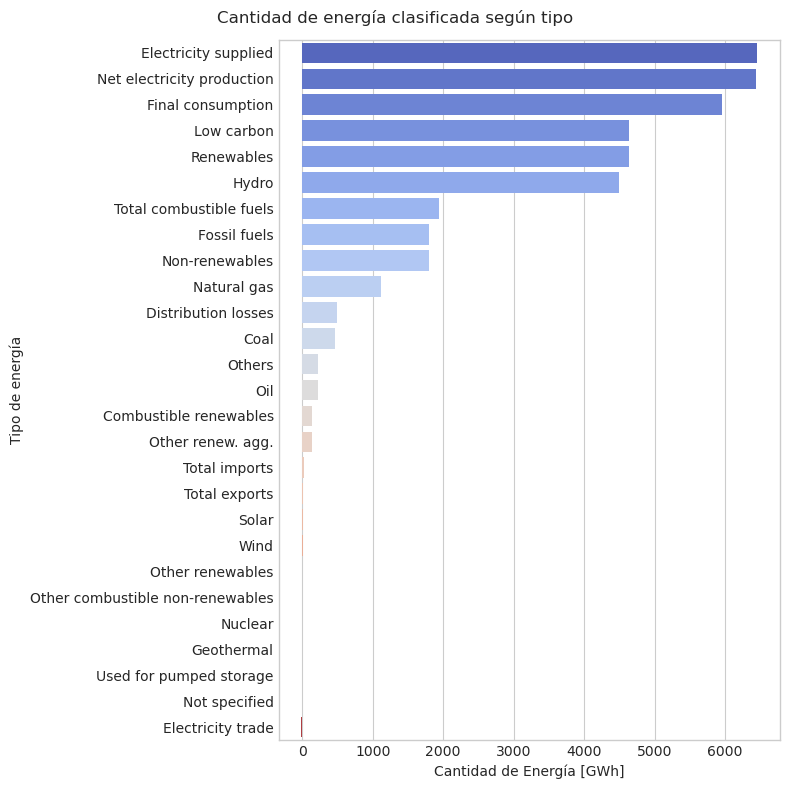

In [17]:
order = df.groupby('product').mean()['value'].sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Cantidad de energía clasificada según tipo')

sns.barplot(data=df, x='value', y='product', ax=ax, estimator='mean', errorbar=None, order=order, palette='coolwarm')
ax.set_xlabel('Cantidad de Energía [GWh]')
ax.set_ylabel('Tipo de energía')

plt.tight_layout()

# 5. Evolución de la producción neta de energía en Colombia

## 5.1. Evolución de la producción neta de energía en Colombia (2014-2022)

In [18]:
filt = (df['product'] == 'Net electricity production')
df_net = df.loc[filt]

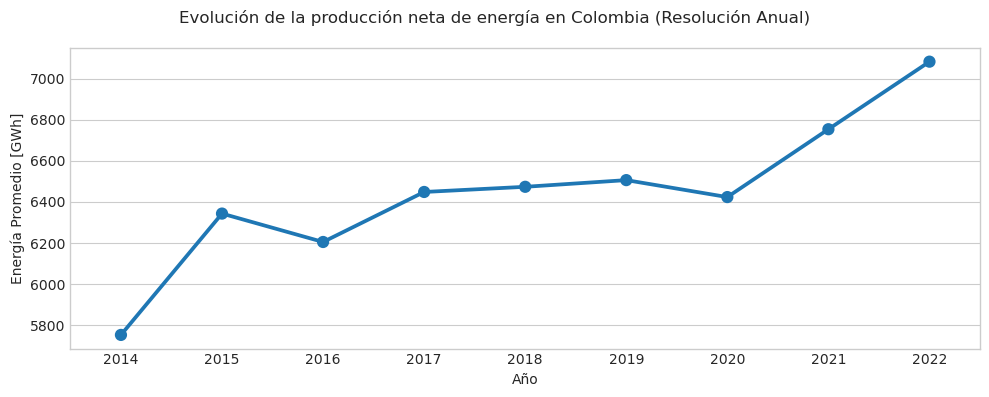

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Evolución de la producción neta de energía en Colombia (Resolución Anual)')

sns.pointplot(data=df_net, x='year', y='value', ax=ax, estimator='mean', errorbar=None)
ax.set_xlabel('Año')
ax.set_ylabel('Energía Promedio [GWh]')

plt.tight_layout()

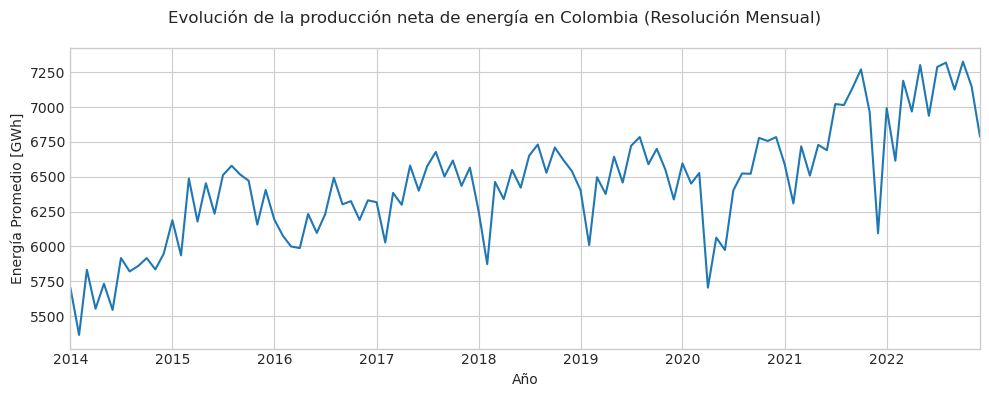

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Evolución de la producción neta de energía en Colombia (Resolución Mensual)')

sns.lineplot(data=df_net[['datetime','value']], x='datetime', y='value')
ax.set_xlabel('Año')
ax.set_ylabel('Energía Promedio [GWh]')
ax.set_xlim(pd.to_datetime('2014-01-01'), pd.to_datetime('2022-12-01'))

plt.tight_layout()

## 5.2. Producción neta mensual de energía en Colombia

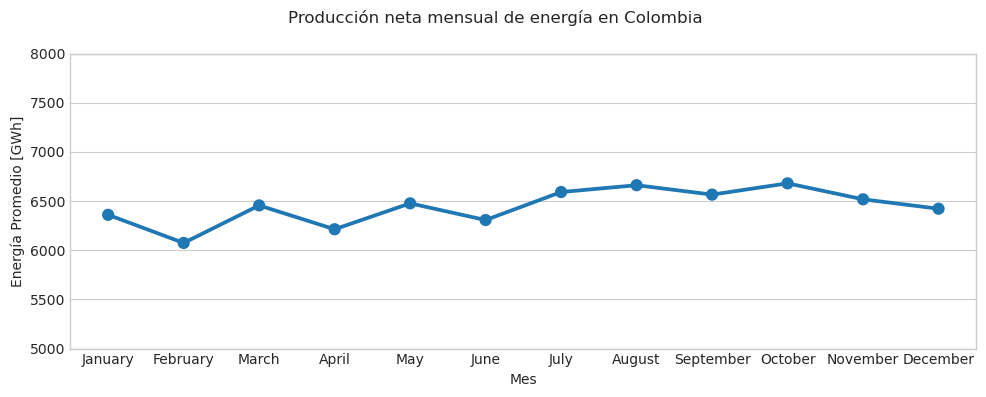

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Producción neta mensual de energía en Colombia')

sns.pointplot(data=df_net, x='month_name', y='value', ax=ax, estimator='mean', errorbar=None)
ax.set_xlabel('Mes')
ax.set_ylabel('Energía Promedio [GWh]')
ax.set_ylim([5000, 8000])

plt.tight_layout()

# 6. Matriz energética de Colombia

In [22]:
filt = ['Wind', 'Solar', 'Other renew. agg.', 'Others', 'Nuclear', 'Natural gas', 'Hydro', 'Coal']
df_gen = df[df['product'].isin(filt)]

In [23]:
df_gen.head()

,country,year,month,month_name,product,value,share,datetime
46557,Colombia,2014,1,January,Hydro,3903.977,0.684582,2014-01-01
46558,Colombia,2014,1,January,Wind,5.648,0.000990,2014-01-01
46559,Colombia,2014,1,January,Solar,1.065,0.000187,2014-01-01
46561,Colombia,2014,1,January,Coal,521.938,0.091524,2014-01-01
46563,Colombia,2014,1,January,Natural gas,1031.146,0.180817,2014-01-01


In [24]:
matrix = df_gen.groupby('product').sum()['value'].sort_values(ascending=False)
matrix

product
Hydro                484841.379477
Natural gas          121110.655778
Coal                  49898.067192
Others                23889.407904
Other renew. agg.     14550.226834
Solar                  1187.545802
Wind                    431.984655
Nuclear                   0.000000
Name: value, dtype: float64

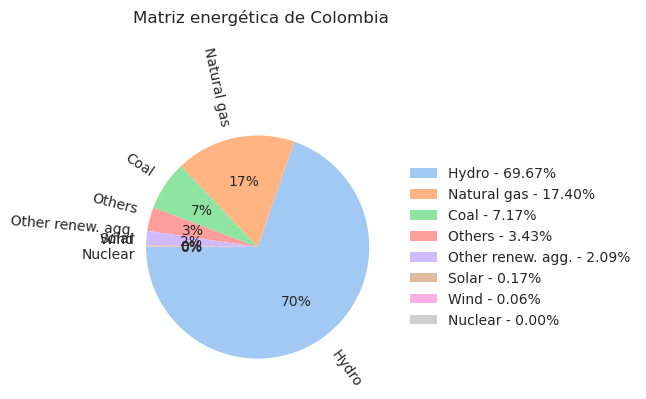

In [25]:
labels = matrix.index

fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Matriz energética de Colombia')

ax.pie(x=matrix, labels=labels, autopct='%.0f%%', rotatelabels=True,startangle=180, colors=sns.color_palette("pastel"));
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["{} - {:.2f}%".format(i,j/sum(matrix)*100) for i,j in zip(labels,matrix)], frameon=False)

plt.tight_layout()

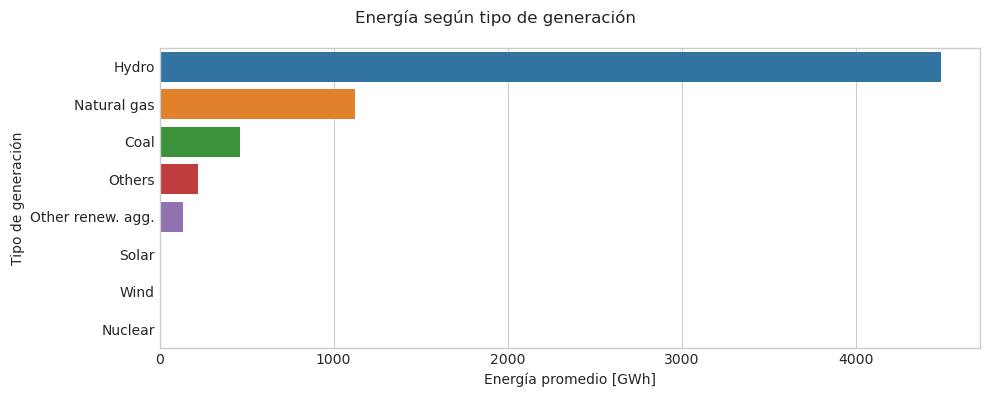

In [26]:
order = df_gen.groupby('product').mean()['value'].sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Energía según tipo de generación')

sns.barplot(data=df_gen, x='value', y='product', ax=ax, estimator='mean', errorbar=None, order=order)
ax.set_xlabel('Energía promedio [GWh]')
ax.set_ylabel('Tipo de generación')

plt.tight_layout()

## 6.1. Evolución de la matriz energética en Colombia

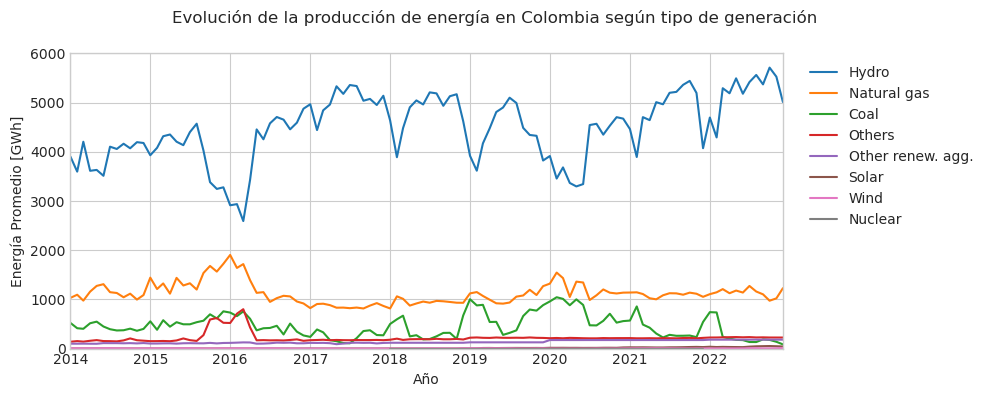

In [27]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Evolución de la producción de energía en Colombia según tipo de generación')

sns.lineplot(data=df_gen, x='datetime', y='value', ax=ax, hue='product', estimator='mean', errorbar=None, hue_order=order,)
ax.set_xlabel('Año')
ax.set_ylabel('Energía Promedio [GWh]')
ax.set_xlim([pd.to_datetime('2014-01-01'), pd.to_datetime('2022-12-01')])
ax.set_ylim([0, 6000])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()

In [28]:
df_gen_year = df_gen.groupby(['year','product']).mean()
df_gen_year.sort_values(['year', 'value'], ascending=[True, False], inplace=True)

In [29]:
df_gen_year.head(14)

month        value     share
year product                                        
2014 Hydro                6.5  3937.424333  0.683935
     Natural gas          6.5  1113.783417  0.193978
     Coal                 6.5   429.340833  0.074847
     Others               6.5   159.849250  0.027787
     Other renew. agg.    6.5   105.341083  0.018314
     Wind                 6.5     5.790167  0.001010
     Solar                6.5     0.745583  0.000130
2015 Hydro                6.5  3994.836750  0.629932
     Natural gas          6.5  1404.155417  0.221308
     Coal                 6.5   554.467500  0.087263
     Others               6.5   276.451667  0.043583
     Other renew. agg.    6.5   107.217833  0.016909
     Wind                 6.5     5.624750  0.000887
     Solar                6.5     0.745583  0.000118

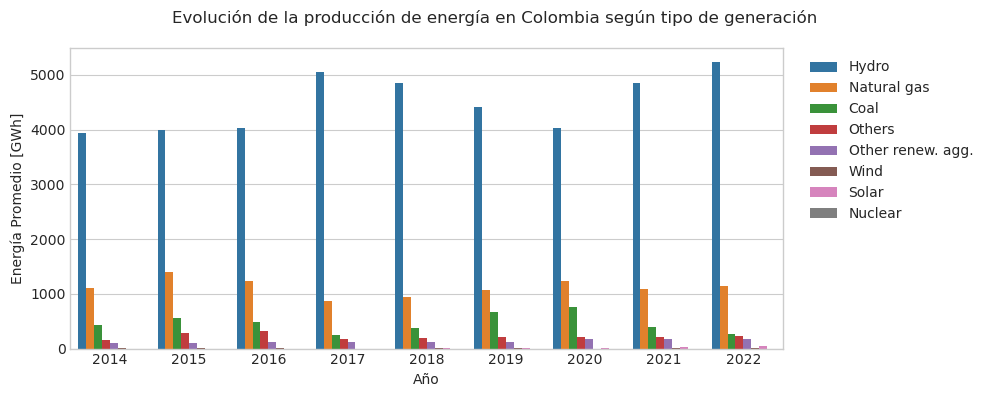

In [30]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Evolución de la producción de energía en Colombia según tipo de generación')

sns.barplot(data=df_gen_year.reset_index(), x='year', y='value', hue='product')
ax.set_xlabel('Año')
ax.set_ylabel('Energía Promedio [GWh]')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()

# 7. Renovables vs No renovables

In [31]:
filt = ['Non-renewables', 'Renewables']
df_nr = df[df['product'].isin(filt)]

In [32]:
df_nr.head()

,country,year,month,month_name,product,value,share,datetime
46572,Colombia,2014,1,January,Renewables,4010.411,0.703246,2014-01-01
46573,Colombia,2014,1,January,Non-renewables,1692.303,0.296754,2014-01-01
47563,Colombia,2014,2,February,Renewables,3703.603,0.690345,2014-02-01
47564,Colombia,2014,2,February,Non-renewables,1661.258,0.309655,2014-02-01
48554,Colombia,2014,3,March,Renewables,4313.454,0.739553,2014-03-01


## 7.1. Proporción de producción de energía en Colombia. Renovables vs No renovables

In [33]:
suma = df_nr.groupby('product').sum()['value'].sort_values(ascending=False)
suma

product
Renewables        501011.136768
Non-renewables    194898.130874
Name: value, dtype: float64

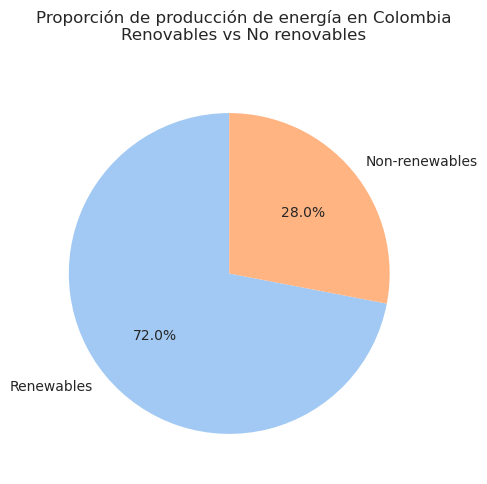

In [34]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.suptitle('Proporción de producción de energía en Colombia\nRenovables vs No renovables')

ax.pie(x=suma, labels=suma.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette("pastel"))

plt.tight_layout()

## 7.2. Evolución de la producción de energía en Colombia. Renovable vs no renovable (2014-2022)

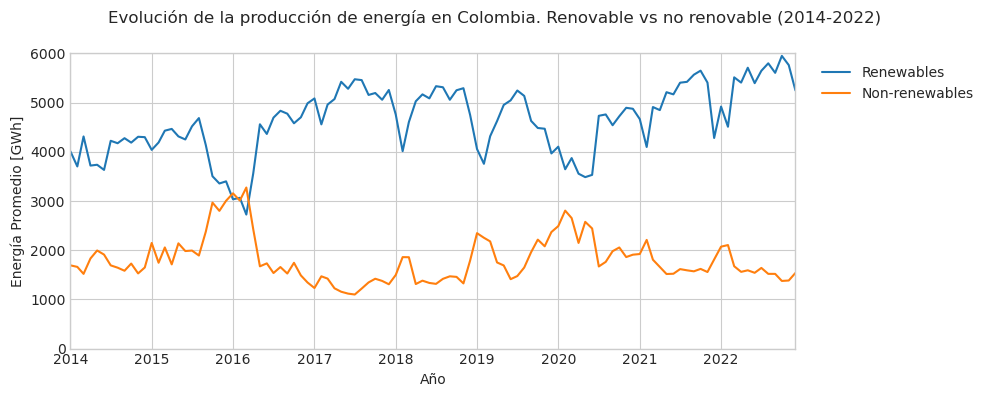

In [35]:
fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Evolución de la producción de energía en Colombia. Renovable vs no renovable (2014-2022)')

sns.lineplot(data=df_nr, x='datetime', y='value', ax=ax, hue='product', estimator='mean', errorbar=None)
ax.set_xlabel('Año')
ax.set_ylabel('Energía Promedio [GWh]')
ax.set_xlim([pd.to_datetime('2014-01-01'), pd.to_datetime('2022-12-01')])
ax.set_ylim([0, 6000])
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()

# X. Análisis Multivariado

### Work in progress

# X. Conclusiones EDA

- Work in progress
-  